In [1]:
import argparse

import matplotlib.pyplot as plt

import audio

import time
%matplotlib inline
import torch as th
import torch as th
import torch.nn.functional as th_f
import torchaudio.functional as th_audio_f

import numpy as np

import scipy.signal
import scipy.io.wavfile

from typing import Tuple

In [2]:

def diff(x: th.Tensor) -> th.Tensor:
    """

    :param x:
    :type x:
    :return:
    :rtype:
    """
    return th_f.pad(x[1:, :] - x[:-1, :], (0, 0, 1, 0), "constant", 0)
def unwrap(phi: th.Tensor) -> th.Tensor:
    """

    :param phi:
    :type phi:
    :return:
    :rtype:
    """
    dphi = diff(phi)
    dphi_m = ((dphi + np.pi) % (2 * np.pi)) - np.pi
    dphi_m[(dphi_m == -np.pi) & (dphi > 0)] = np.pi
    phi_adj = dphi_m - dphi
    phi_adj[dphi.abs() < np.pi] = 0
    return phi + phi_adj.cumsum(0)

In [9]:
cplx_values = audio.wav_to_stft("./wav_files/jazz_1.0.wav")

magn, phase = audio.stft_to_phase_magn(cplx_values)
idx = 0

0
torch.Size([])


/var/folders/5_/9pgxhh7d41sdhrygjgxl4r1h0000gn/T/ipykernel_14185/4290876304.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/var/folders/5_/9pgxhh7d41sdhrygjgxl4r1h0000gn/T/ipykernel_14185/4290876304.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


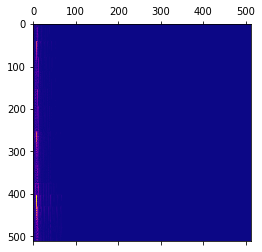

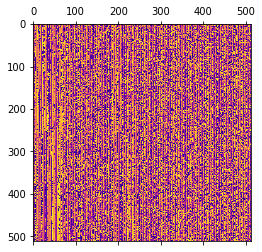

In [10]:
magn = magn[idx]
phase = phase[idx]


fig, ax = plt.subplots()
ax.matshow(magn / (magn.max() - magn.min()), cmap='plasma')
fig.show()

fig, ax = plt.subplots()
ax.matshow(phase / (phase.max() - phase.min()), cmap='plasma')
fig.show()